## Part one , Les algorithmes de recherches


In [44]:
import numpy as np                              # pour generer des tableau
import pandas as pd 
import matplotlib.pyplot as plt                 # pour representaion graphique 
import time 
import math 
import random                                   # generer random values pour les tableaux

### Implementation des algortihmes

#### 1 recherche sequentiel tableau non trié  
Complexity :  
meileur cas : element recherché est le premier dans le tableau  O(1)  
pire cas : l'element n'existe pas O(N)


In [45]:
def recherche_NONtrie(tableau,valeur):
    
    end= len(tableau)
    for i in range(end):                    # parcourir le tableau
        
        if tableau[i]==valeur:
                                            # tester l'égalité et retourner l'indice si existe
            return i 
                                            # return null si n'existe pas
    return None

    

#### 2 recherche sequentiel tableau trié  
Complexity :  
meileur cas : element recherché est le premier dans le tableau ou valeur inferieur au premier element  O(1)  
pire cas : l'element existe dans la derniere case  O(N)

In [46]:
def recherche_trie(tableau , valeur):
    
    if(valeur > tableau[-1]):
        return None                 # cas ou la valeur depasse le max du tableau 
    
    end= len(tableau)
    i = 0
    
    while(tableau[i] < valeur):
            i +=1                               # parcourir le tableau jusqua premier element superieur a la valeur 
            
    if(tableau[i]==valeur):
        return i 
    return None                     # sinon la valeur existe 
    
            

            

#### 3 Recherche dichotomique (binary)
meilleur cas : valeur est au milieu du tableau   O(1)  
pire cas :  valeur n'existe pas O(log(n))

In [47]:
def recherche_dichotomique(tableau , valeur):
    
        deb = 0
        fin = len(tableau)-1
        
        while( deb <= fin):
            
            mid = int((fin+deb)/2)                     # test avec la valeur au mileu 
            
            if valeur==tableau[mid]:
                return mid
            elif valeur > tableau[mid]:                     # si valeur superieur alors on test la partie droite du tableau
                deb = mid+1
            else:                                           # sinon tester la partie gauche 
                fin= mid-1
        
        return None                                         

### Etude experimental 


#### a \) Pire cas 
non ordonee : n'existe pas  
ordonee : soit la derniere au tableau  
dichotomique : n'existe pas  

#### b \) Meilleur cas 
non ordonee : premiere valeur du tableau  
ordonee :  premiere valeur du tableau ou out of borders  
dichotomique : au milieu du tableau 

In [67]:

tailletableau=[100000,200000,400000,600000,800000,1000000,1200000,1400000,1600000,1800000]

temps_pire_nontrie = []
temps_pire_trie = []
temps_pire_dichotomique = []

temps_meill_nontrie = []
temps_meill_trie = []
temps_meill_dichotomique = []


# algo non trie , valeur recherche au pire cas doit pas exister , exemple 10000000



for N in tailletableau:
    
    tab_nonordone = np.random.randint(100,1000000000,size=N)  # generer un tableau de taille=size ayant des valeurs random entre(100 et 1000000000)
   
    tab_ordone = np.random.randint(100,1000000000,size=N) 
    tab_ordone.sort()  
    
    # algo non trie
    #valeur recherche au pire cas doit pas exister , exemple 20

    debut = time.time()
    
    recherche_NONtrie(tab_nonordone,20)    
    
    fin = time.time()            
    
    temps_pire_nontrie.append(fin-debut)
    
    # meilleur cas , la valeur soit le premier element du tableau 
    
    tab_nonordone[0]=20
    
    debut = time.time()
    
    recherche_NONtrie(tab_nonordone,20) 
    
    fin = time.time()            
    
    temps_meill_nontrie.append(fin-debut)
    


    # algo trie sequentielle 
    # valeur recherche au pire cas peu etre importe ou dans le tableau 


    debut = time.time()
    
    recherche_trie(tab_ordone ,np.random.randint(800000000,1000000000) ) # random value 
     
    fin = time.time()            
    
    temps_pire_trie.append(fin-debut)
    
    # au meilleur cas , la valeur doit etre premier element du tableau 
    
    tab_ordone[0]=20
    debut = time.time()
    
    recherche_trie(tab_ordone ,20 )
     
    fin = time.time()            
    
    temps_meill_trie.append(fin-debut)
    
    
    
    # algo dichotomique 
    # pire cas valeure existe pas exemple : 20
    
    
    debut = time.time()
    
    recherche_dichotomique(tab_ordone ,20 )
     
    fin = time.time()            
    
    temps_pire_dichotomique.append(fin-debut)
    
    
    # au meilleur cas la valeur doit etre au milieu du tableau
    
    milleu = int((len(tab_ordone)-1)/2)
    tab_ordone[milleu]=20
    
    debut = time.time()
    
    recherche_dichotomique(tab_ordone ,20 )
     
    fin = time.time()            
    
    temps_meill_dichotomique.append(fin-debut)
    
    
    
       
    
    
    


 

#### Resultat et Represention Graphique pire cas

In [68]:
pireframe=pd.DataFrame(zip(temps_pire_nontrie , temps_pire_trie ,temps_pire_dichotomique ) , index=tailletableau , columns=["Sequentiel non trié" , "sequentiel trié" , "dichotimique"])
print(pireframe)
pireframe.to_csv("result pire cas.csv")

         Sequentiel non trié  sequentiel trié  dichotimique
100000              0.041565         0.042651           0.0
200000              0.077292         0.086919           0.0
400000              0.160917         0.167296           0.0
600000              0.301075         0.312705           0.0
800000              0.387977         0.453557           0.0
1000000             0.509932         0.557525           0.0
1200000             0.524054         0.453314           0.0
1400000             0.581366         0.725503           0.0
1600000             0.740062         0.900495           0.0
1800000             0.841948         0.648726           0.0


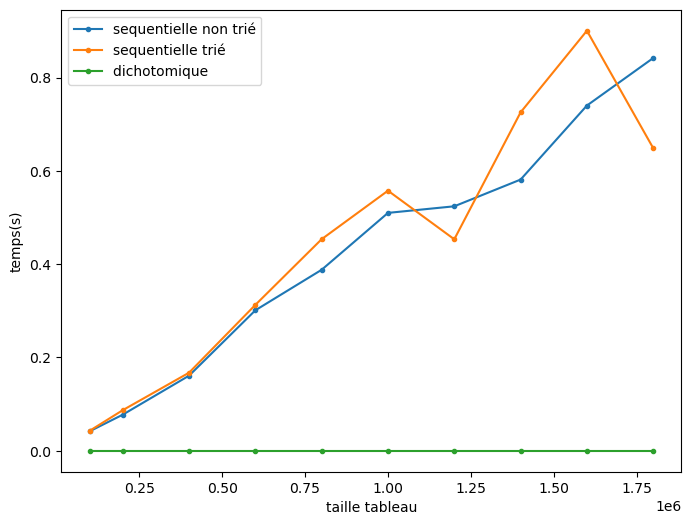

In [69]:
plt.figure(figsize=(8,6))

plt.plot(tailletableau , temps_pire_nontrie , '.-' , label="sequentielle non trié")
plt.plot(tailletableau , temps_pire_trie , '.-' , label="sequentielle trié")
plt.plot(tailletableau , temps_pire_dichotomique , '.-' , label="dichotomique ")
plt.xlabel("taille tableau")
plt.ylabel("temps(s)")
plt.legend()
plt.savefig("comparison_recherche.png")
plt.show()




#### Resultats meilleur cas 

In [70]:
meillframe=pd.DataFrame(zip(temps_meill_nontrie , temps_meill_trie ,temps_meill_dichotomique ) , index=tailletableau , columns=["Sequentiel non trié" , "sequentiel trié" , "dichotimique"])
print(meillframe)
meillframe.to_csv("result meill cas.csv")

         Sequentiel non trié  sequentiel trié  dichotimique
100000                   0.0              0.0           0.0
200000                   0.0              0.0           0.0
400000                   0.0              0.0           0.0
600000                   0.0              0.0           0.0
800000                   0.0              0.0           0.0
1000000                  0.0              0.0           0.0
1200000                  0.0              0.0           0.0
1400000                  0.0              0.0           0.0
1600000                  0.0              0.0           0.0
1800000                  0.0              0.0           0.0
